In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

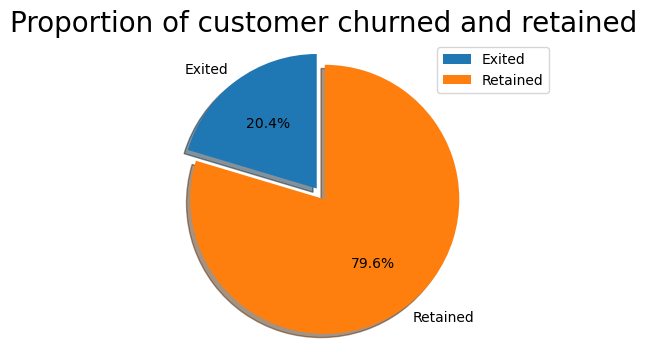

In [4]:
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.legend()
plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

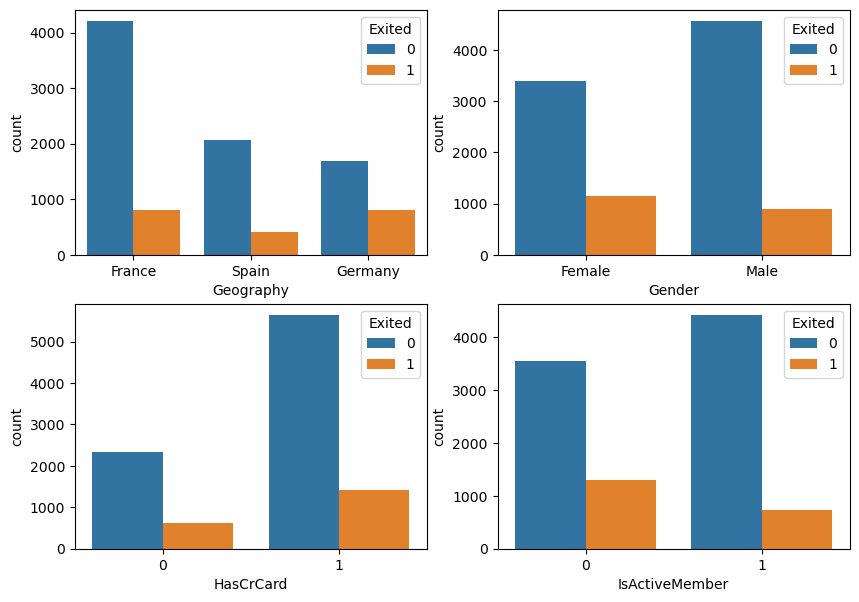

In [5]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 7))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

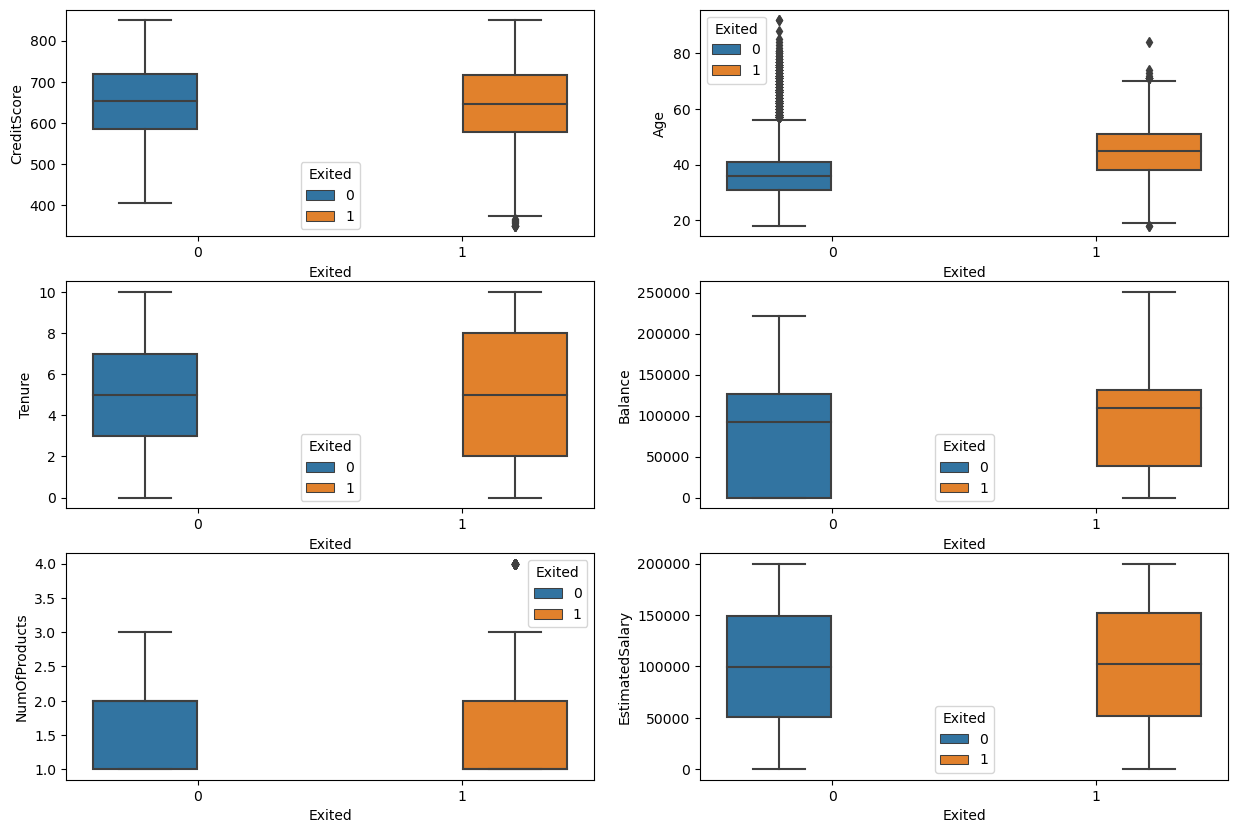

In [6]:
    # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(15, 10))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Geography'] = encoder.fit_transform(data['Geography'])

In [9]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Exited', ylabel='count'>

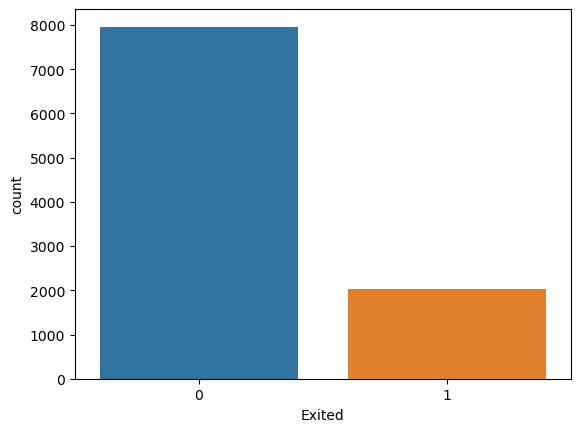

In [10]:
sns.countplot(data['Exited'])

In [11]:
x = data.drop(['Exited'], axis=1)
y = data['Exited']

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x1, y1 = smote.fit_resample(x, y)

print('Original datashape', y.value_counts())
print('Resample datashape', y1.value_counts())

Original datashape 0    7963
1    2037
Name: Exited, dtype: int64
Resample datashape 1    7963
0    7963
Name: Exited, dtype: int64


<AxesSubplot:xlabel='Exited', ylabel='count'>

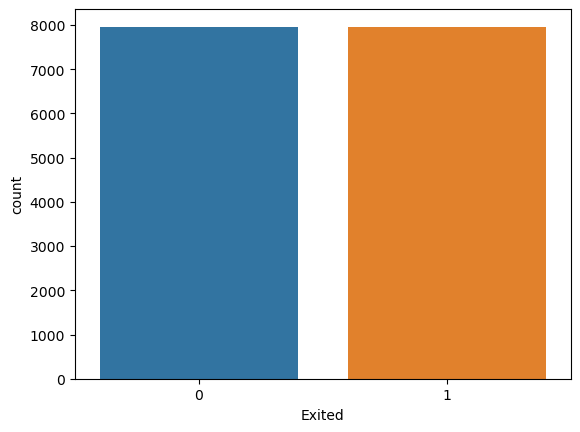

In [13]:
sns.countplot(y1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=123)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.3574092962618489

In [19]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
logistic_model.score(X_test, y_test)

0.7685223943072416

In [20]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train,y_train)
forest_model.score(X_test, y_test)

0.8537044788614483

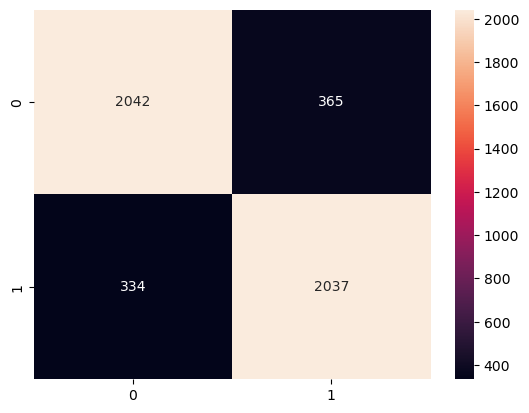

In [21]:
y_pred = forest_model.predict(X_test)
y_pred_prob = forest_model.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.savefig('forest_model_matrix.png')

In [15]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [23]:
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)
run_metrics

{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.86, 'entropy': 0.36}

ML Flow experiment tracking

In [24]:
experiment_name = "basic_classifier" ##basic classifier of Random forest
run_name="forest_classifier"
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)
print(run_metrics)


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.86, 'entropy': 0.36}


In [39]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    mlflow.set_tracking_uri("http://localhost:1234") #uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run():
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_matrix')
            
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Basic classifier", "tag3":"Production"})
            
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))


In [26]:
create_experiment(experiment_name,run_name,run_metrics,forest_model,'forest_model_matrix.png')

2022/12/16 19:41:55 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



Run - forest_classifier is logged to Experiment - basic_classifier


Hyper-parameter tuning

In [16]:

# define random parameters grid
n_estimators = [80, 100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [20, 30] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6] # minimum sample number to split a node
min_samples_leaf = [1, 3] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points


classifier = RandomForestClassifier()
model_tuning = GridSearchCV(estimator = classifier, param_grid = {'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf,
          'bootstrap': bootstrap
        }, verbose=2)
        
## model_tuning.fit(X_train, y_train)

# print the best parameters
print ('Best Parameters: ', model_tuning.best_params_, ' \n')

best_params = model_tuning.best_params_

n_estimators = best_params['n_estimators']
min_samples_split = best_params['min_samples_split']
min_samples_leaf = best_params['min_samples_leaf']
max_features = best_params['max_features']
max_depth = best_params['max_depth']
bootstrap = best_params['bootstrap']

model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                                min_samples_leaf= min_samples_leaf, max_features = max_features,
                                max_depth= max_depth, bootstrap=bootstrap) 
## model_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time

RandomForestClassifier(max_depth=20)

In [17]:
model_tuned.score(X_test, y_test)

0.8578903306822938

In [18]:
import pickle
pickle.dump(model_tuned, open('model_tuned.pkl', 'wb'))

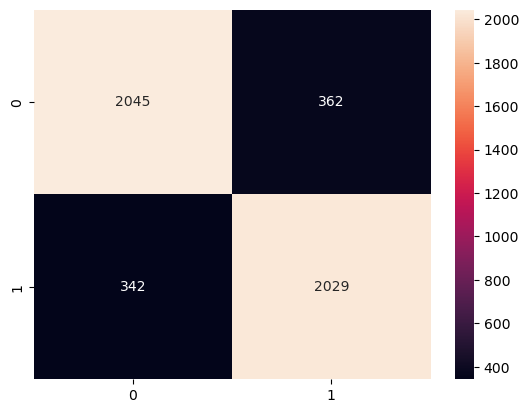

In [29]:
y_pred = model_tuned.predict(X_test)
y_pred_prob = model_tuned.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.savefig('Optimized_forest_matrix.png')

In [30]:
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)
run_metrics

{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.86, 'entropy': 0.35}

ML Flow

Experiment tracking and model versioning

In [41]:
experiment_name = "optimized model"
run_name="Grid_Search_CV_Tuned_Model"
# model_tuned,best_params = hyper_parameter_tuning(X_train, y_train)
run_params = best_params

y_pred = model_tuned.predict(X_test) #will return the predicted class
y_pred_prob = model_tuned.predict_proba(X_test) #model.predict_proba(X_test)
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)


In [32]:
for param in run_params:
    print(param, run_params[param])

bootstrap True
max_depth 30
max_features sqrt
min_samples_leaf 1
min_samples_split 2
n_estimators 100


In [ ]:
create_experiment(experiment_name,run_name,run_metrics,model_tuned,'optimized_forest_matrix.png',run_params)